# DBSCAN (Customer Data)

Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

In [124]:
df = pd.read_csv("wholesome_customers_data.csv")

In [125]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [126]:
df.shape

(440, 8)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [128]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [129]:
for col in df.columns:
    print(col)
    print(df[col].nunique())

Channel
2
Region
3
Fresh
433
Milk
421
Grocery
430
Frozen
426
Detergents_Paper
417
Delicassen
403


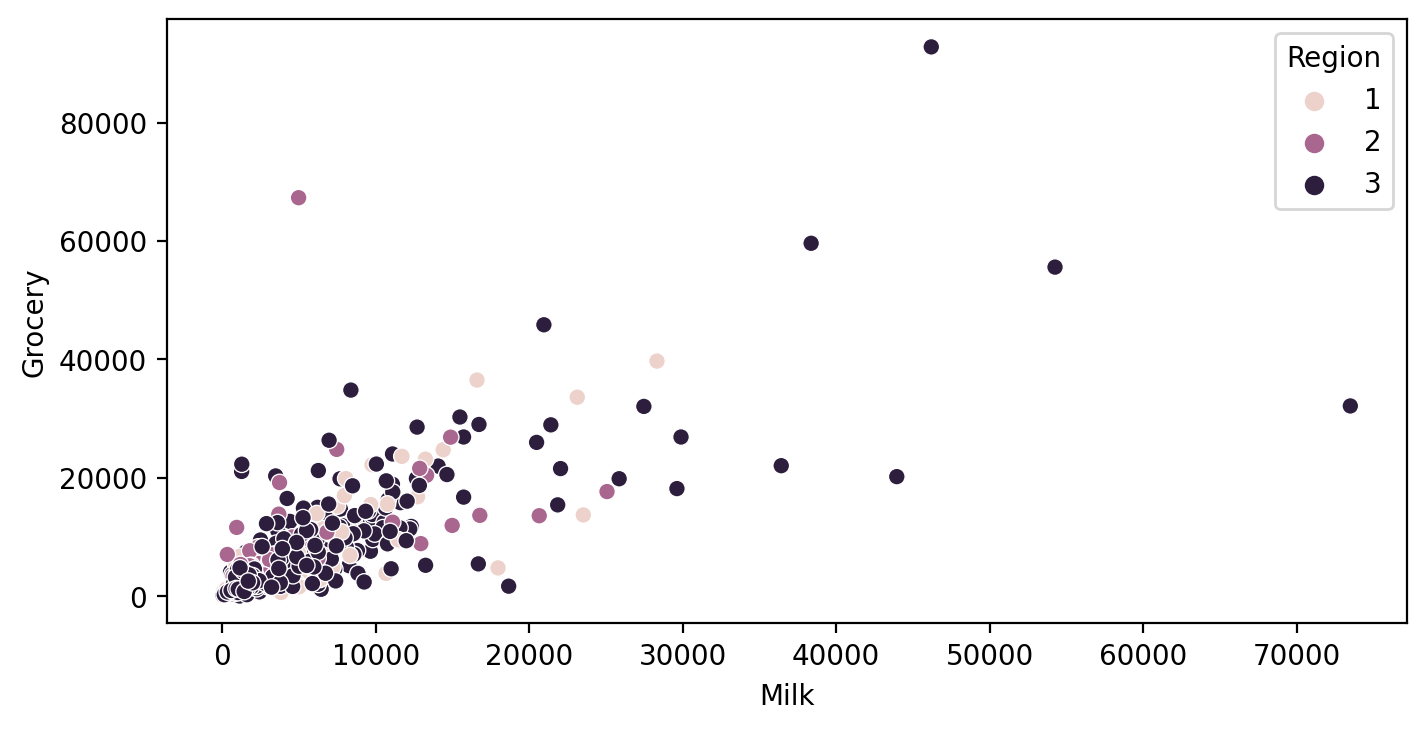

In [130]:
plt.figure(figsize = (8,4), dpi= 200)
sns.scatterplot(data= df, x= "Milk", y= "Grocery", hue= "Region")
plt.show()

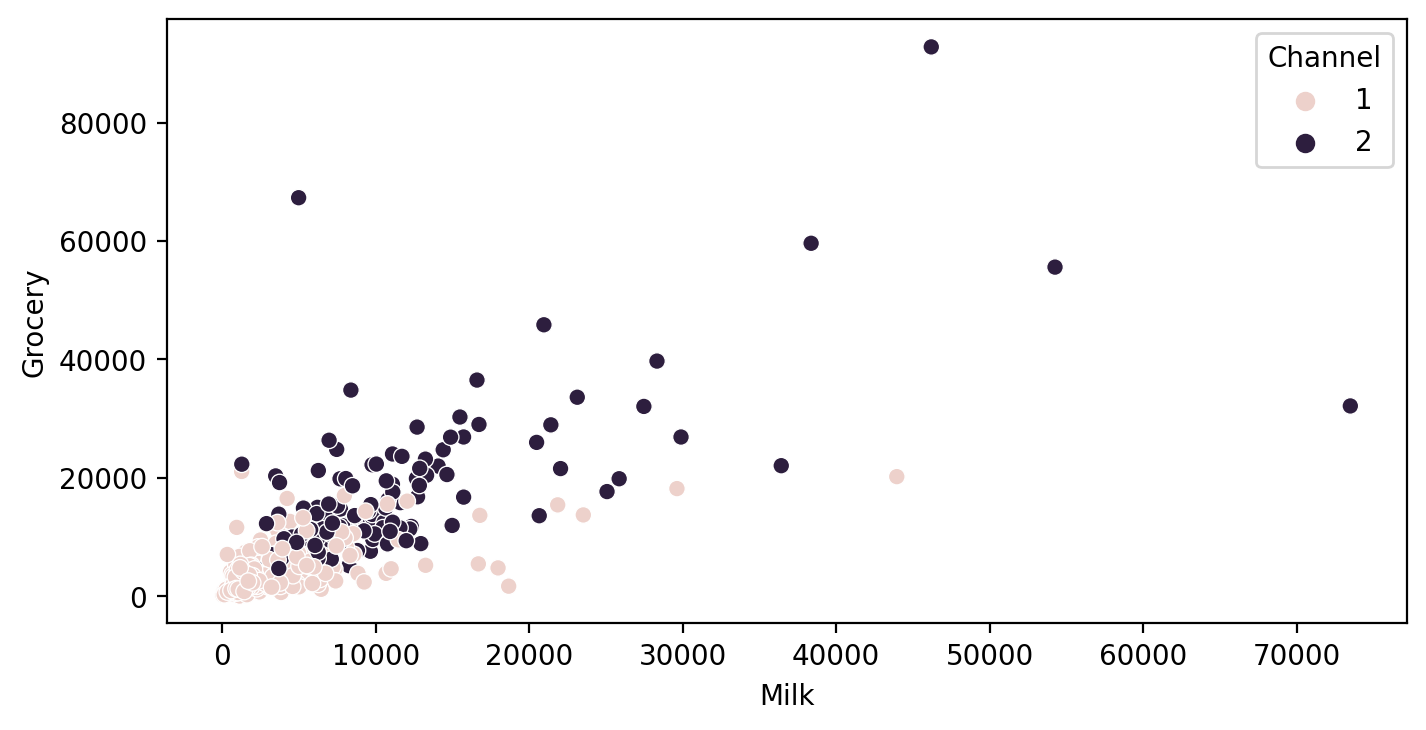

In [131]:
plt.figure(figsize = (8,4), dpi= 200)
sns.scatterplot(data= df, x= "Milk", y= "Grocery", hue= "Channel")
plt.show()

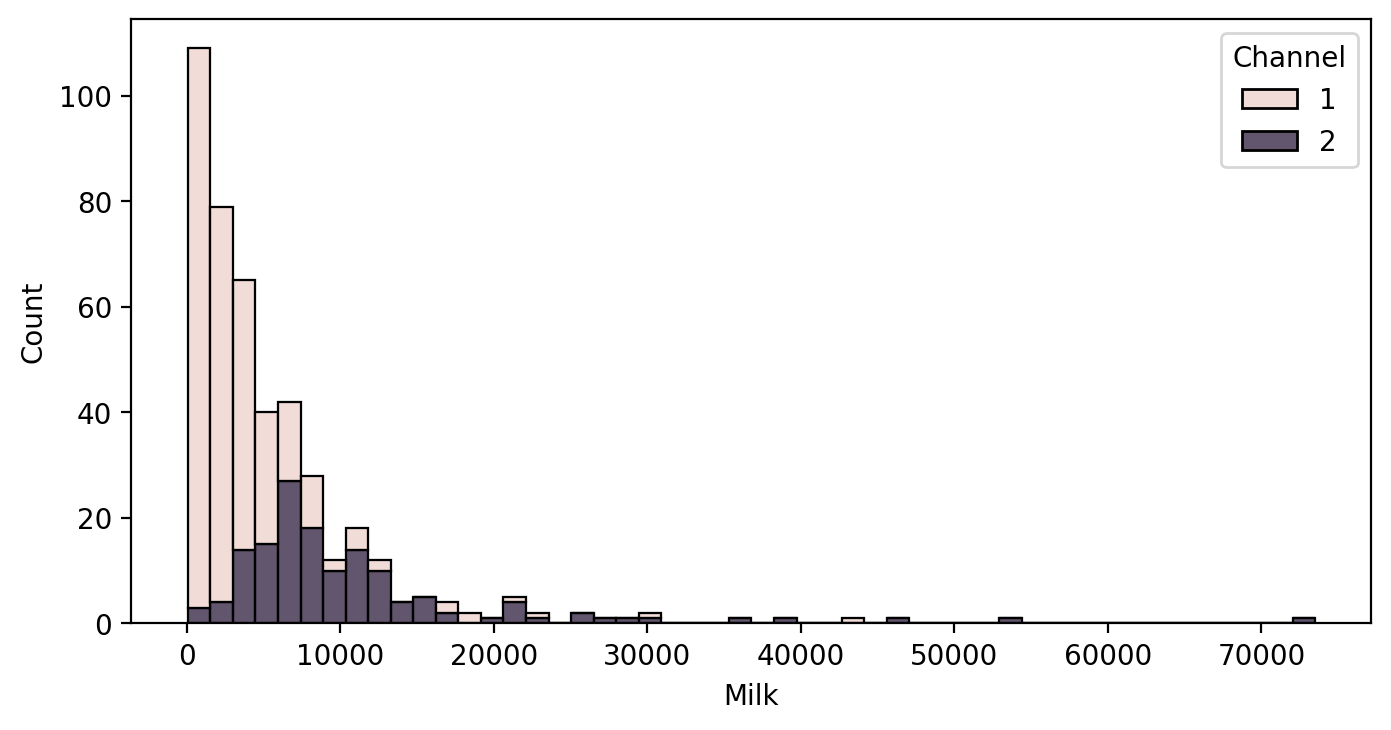

In [132]:
plt.figure(figsize = (8,4), dpi= 200)
sns.histplot(data= df, x= "Milk", hue= "Channel", multiple= "stack")
plt.show()

<Figure size 1600x800 with 0 Axes>

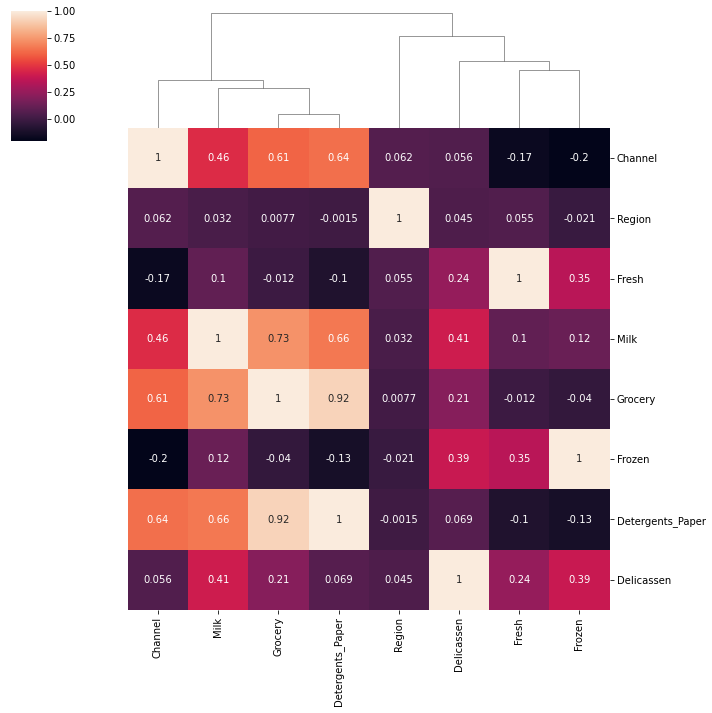

In [133]:
plt.figure(figsize = (8,4), dpi= 200)
sns.clustermap(df.corr(), row_cluster= False, annot= True)
plt.show()

### Dummies for Categorical:

In [134]:
x = pd.get_dummies(df, columns=["Region","Channel"])

In [135]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,12669,9656,7561,214,2674,1338,0,0,1,0,1
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1,1,0
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1


In [136]:
x.shape

(440, 11)

### Scalling:

In [137]:
sc = StandardScaler()

In [138]:
temp = sc.fit_transform(x)
x = pd.DataFrame(temp, columns= x.columns)
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.460566,-0.345822,0.626422,-1.448652,1.448652
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.460566,-0.345822,0.626422,-1.448652,1.448652
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.460566,-0.345822,0.626422,-1.448652,1.448652
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.460566,-0.345822,0.626422,0.690297,-0.690297
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.460566,-0.345822,0.626422,-1.448652,1.448652


### Finding Epsilon Value:

In [139]:
percentage_of_outliers = []

for e in np.linspace(0.001, 3, 50):
    
    dbscan = DBSCAN(eps= e, min_samples=16)
    
    dbscan.fit(x)
    
    # percentage of Outlier Points
    percentage_of_outliers.append(np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100)

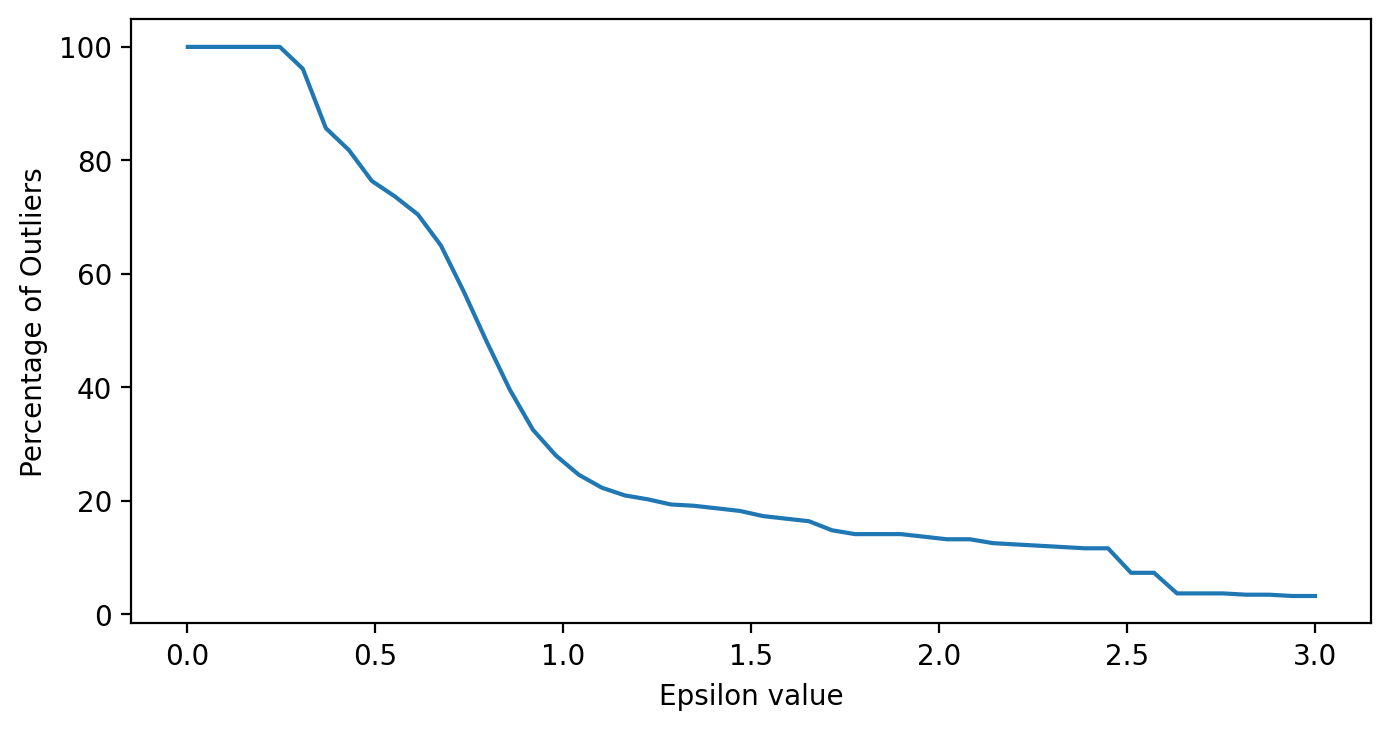

In [140]:
plt.figure(figsize = (8,4), dpi= 200)
plt.plot(np.linspace(0.001, 3, 50), percentage_of_outliers)
plt.xlabel("Epsilon value")
plt.ylabel("Percentage of Outliers")
plt.show()

In [141]:
# Epsilon = 2.5

In [142]:
dbscan = DBSCAN(eps= 2.5)

In [143]:
dbscan.fit(x)

DBSCAN(eps=2.5)

In [144]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1,  0, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  3,  2,  3,  3,  2,  2,  3,  3,
        3,  2,  3,  2,  3,  2,  3, -1,  3,  3,  2,  3,  2,  3,  2,  3,  3,
        3,  3,  2,  3,  3

In [145]:
np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100

3.1818181818181817

In [146]:
df["Cluster"] = dbscan.labels_

In [147]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


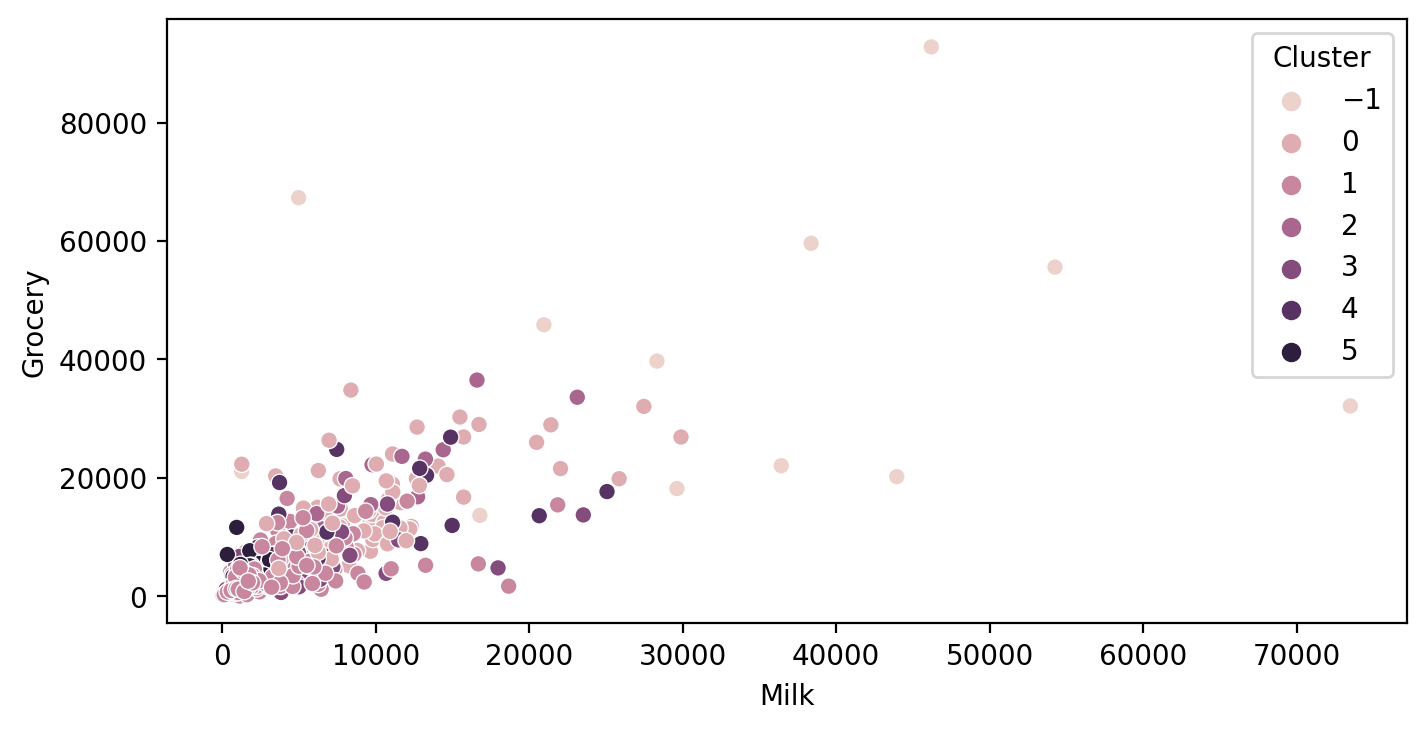

In [148]:
plt.figure(figsize = (8,4), dpi= 200)
sns.scatterplot(data= df, x= "Milk", y= "Grocery", hue= "Cluster")
plt.show()

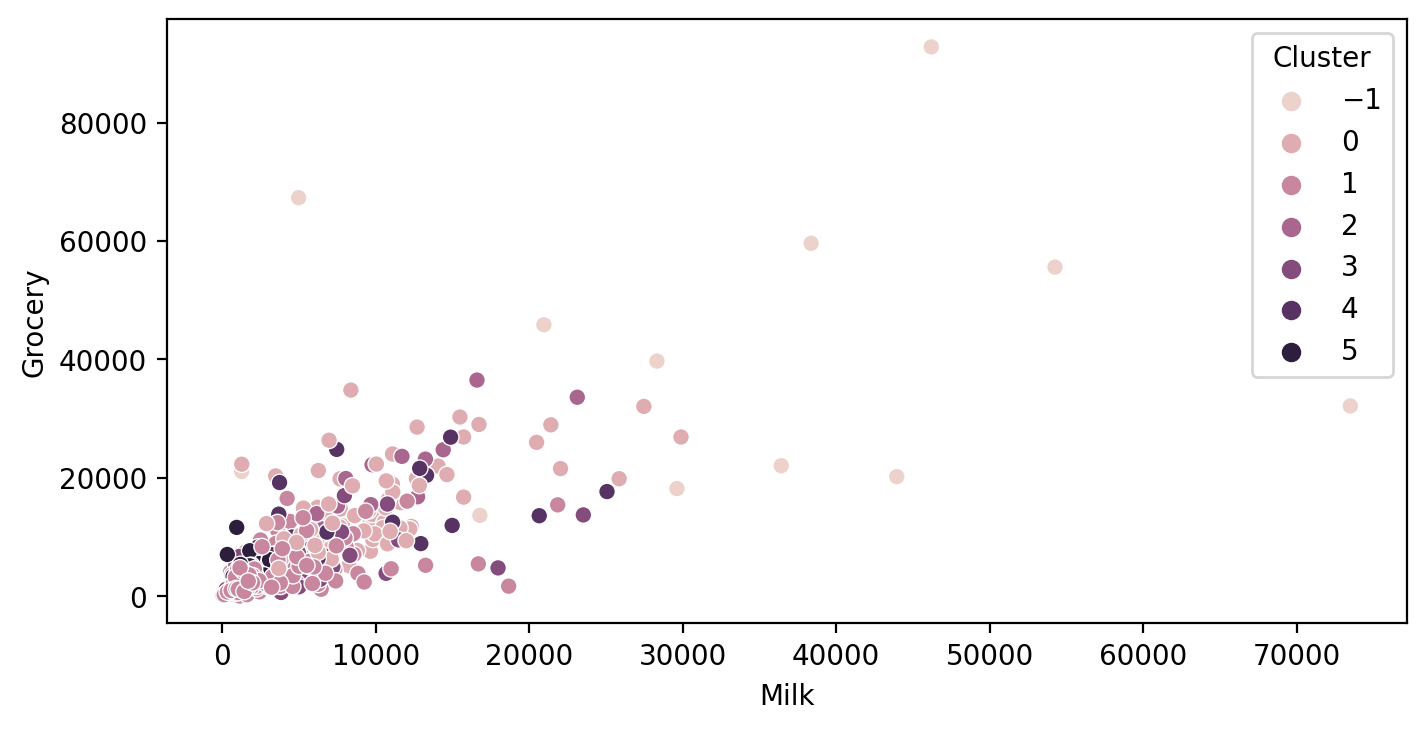

In [149]:
plt.figure(figsize = (8,4), dpi= 200)
sns.scatterplot(data= df, x= "Milk", y= "Grocery", hue= "Cluster")
plt.show()

In [150]:
# Cluster Wise Data Summary:

df.drop(["Channel","Region"], axis= 1).groupby("Cluster").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
-1,30084.071429,28768.071429,35576.214286,13139.142857,15009.357143,9141.642857
0,8953.535354,8922.232323,13810.505051,1420.676768,5899.828283,1631.080808
1,13137.868932,3168.907767,3643.504854,3260.354369,752.330097,1127.883495
2,4793.000000,9752.117647,17223.588235,2457.529412,7567.352941,1813.235294
3,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
4,7218.944444,9424.722222,13494.555556,1618.888889,6760.722222,1240.333333
5,10870.296296,1767.962963,4053.629630,3703.407407,453.481481,939.111111


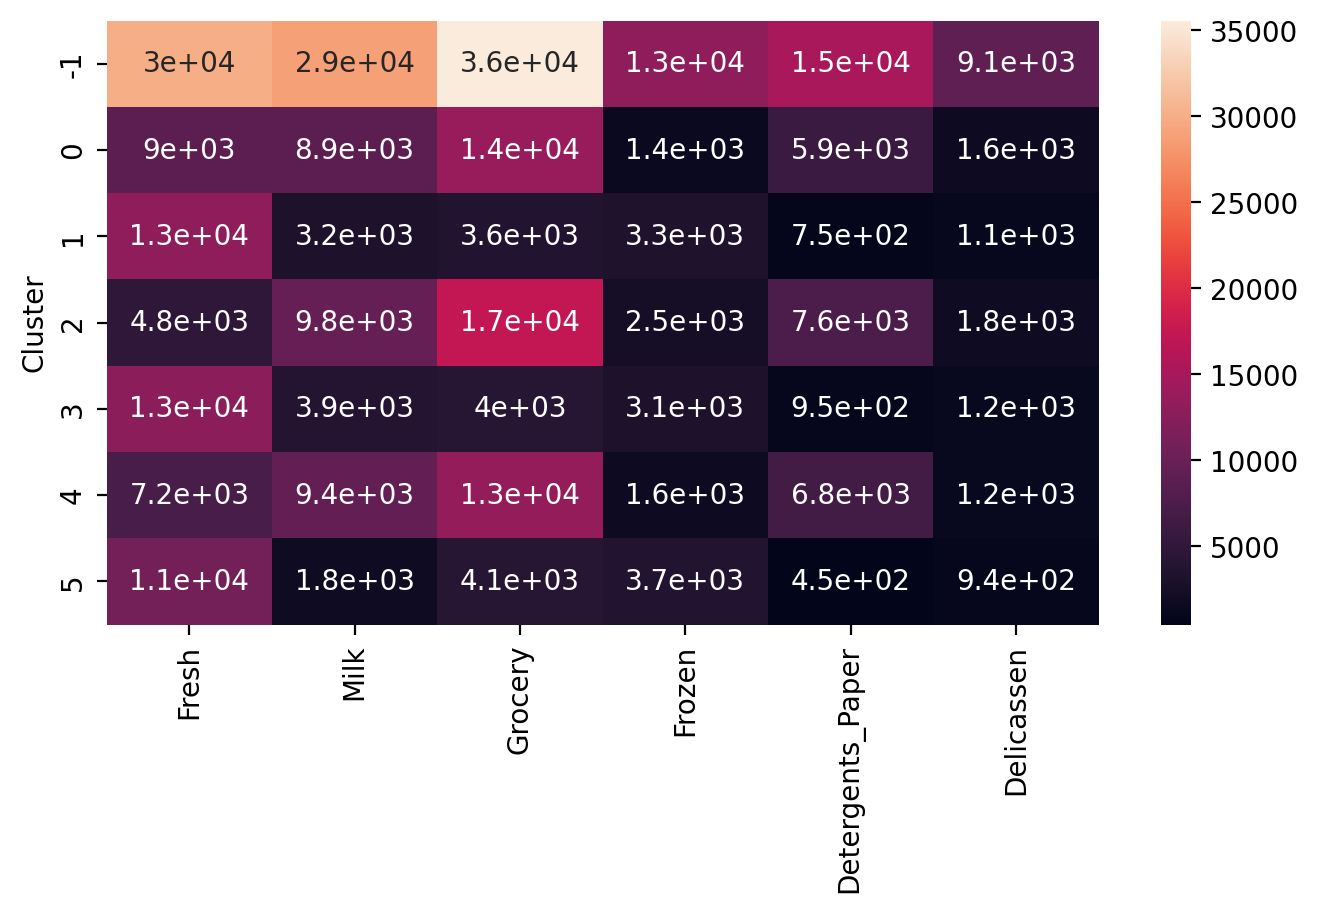

In [151]:
plt.figure(figsize = (8,4), dpi= 200)
sns.heatmap(df.drop(["Channel","Region"], axis= 1).groupby("Cluster").mean(), annot= True)
plt.show()

In [155]:
mn= MinMaxScaler()
new_df = df.drop(["Channel","Region"], axis= 1).groupby("Cluster").mean()
temp = mn.fit_transform(new_df)
new_df = pd.DataFrame(temp, columns= new_df.columns)
new_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.164506,0.264972,0.318388,0.000000,0.374168,0.084361
2,0.329953,0.051887,0.000000,0.156990,0.020531,0.023014
3,0.000000,0.295708,0.425272,0.088480,0.488729,0.106568
4,0.320637,0.077860,0.011982,0.145637,0.034147,0.031459


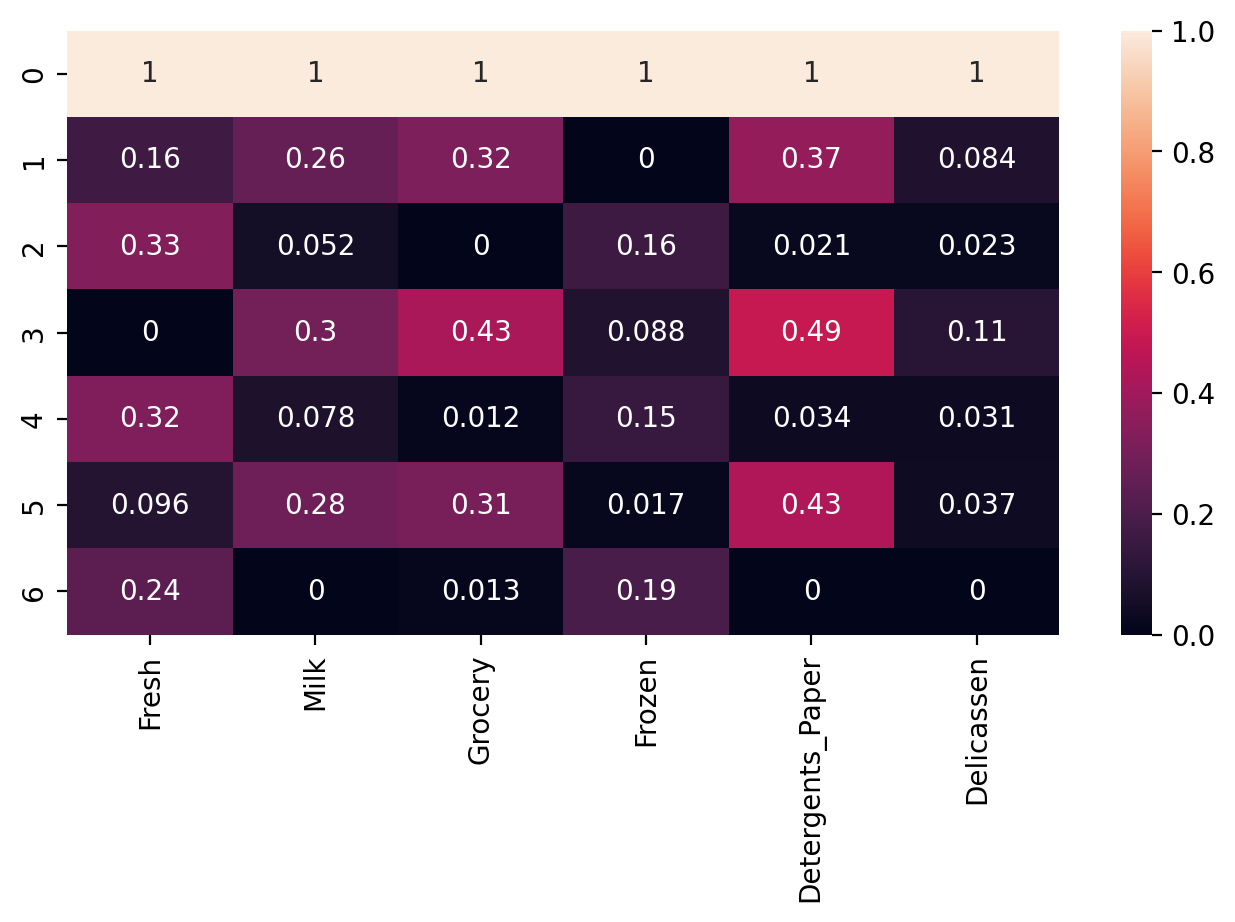

In [156]:
plt.figure(figsize = (8,4), dpi= 200)
sns.heatmap(new_df, annot= True)
plt.show()